# CSE3505 - Foundations of Data Analytics

# Data Analysis with Modelling and Predicting COVID19 Outbreak


# Final Review

### Divyam Sachan (18BLC1020)
### Ritika (18BLC1027)

### Arpit Raj (18BLC1084)





# Importing Libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 

# Reading datasets

In [ ]:
#  About datasets - first three are time series data and last one is aggregated data.

In [ ]:
# Importing confirmed cases data
confirmed_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_cases.shape

(268, 292)

In [ ]:
cols = confirmed_cases.keys()
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813


In [ ]:
# No. of Unique Countries in the data
confirmed_cases["Country/Region"].nunique()

190

In [ ]:
# Checking Data of particular Country in confirmed cases
confirmed_cases[confirmed_cases["Country/Region"]=="Canada"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17343,17343,17749,17909,18062,18235,18357,18357,18357,18935,19211,19354,19718,19995,19995,19995,19995,20956,21199,21443,21775,21775,21775,22673,22996,23402,23829,24261,24261,24261,25733,26155,26565,27042,27664,27664,27664,27664,29932,29932
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,...,8641,8641,8908,9013,9138,9220,9381,9381,9381,9739,9841,9956,10066,10185,10185,10185,10185,10734,10892,11034,11189,11189,11189,11687,11854,12057,12057,12554,12554,12554,13371,13588,13875,14109,14381,14381,14381,15501,15800,16135
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1829,1880,1919,1953,1993,2029,2072,2108,2140,2191,2246,2278,2344,2428,2524,2578,2655,2779,2925,3098,3173,3173,3302,3382,3491,3626,3773,3935,4088,4249,4349,4532,4701,4894,5374,5723,6034,6275,6377,6751
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,200,200,200,200,200,200,200,201,201,203,205,222,225,238,258,272,278,284,292,292,297,297,310,313,313,319,322,324,326,328,331,334,337,341,342,343,344,344,344,347
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,272,273,273,273,274,275,275,276,277,277,277,277,277,279,282,282,283,283,283,284,287,287,287,287,287,287,288,288,289,290,291,291,291,291,291,291,291,291,291,292
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,8,8,9,9,9,9,9,9,10,10,10,10,10,10,10
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1087,1087,1087,1087,1088,1088,1089,1089,1089,1089,1089,1089,1089,1089,1092,1092,1092,1092,1092,1092,1093,1093,1097,1097,1097,1097,1097,1097,1100,1100,1101,1102,1102,1102,1104,1109,1111,1113,1114,1118
48,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,...,51439,52134,52449,53115,54059,54643,55375,55522,56544,57238,57795,58202,58913,60189,61078,61678,61678,63300,64092,64826,65730,65869,67027,67749,68556,69362,70270,71140,71423,73143,73984,74867,75665,76660,77655,78532,79515,80570,81686,82687


In [ ]:
# Importing death cases data
death_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
death_cases.shape

(268, 292)

In [ ]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511,1514,1518,1523,1529,1532,1533,1536,1536,1541,1544,1548
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439,443,448,451,454,458,462,465,469,473,477,480,487,493,499,502,509,518,527,532,536
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907,1914,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59,59,59,59,62,62,63,63,69,69,69,72,72,72,73,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228,234,241,247,248,251,255,260,265,267,268,270,271,275,275,279,284,286,289,291,296


In [ ]:
# Importing recovered cases data
recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered_cases.shape

(255, 292)

In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32635,32642,32642,32746,32789,32842,32842,32842,32852,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354,33447,33516,33561,33614,33760,33790,33824,33831,34010,34023,34129,34150,34217,34237,34239,34258,34321,34326,34342,34355,34362
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7397,7397,7629,7732,7847,8077,8342,8536,8675,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762,9864,9957,10001,10071,10167,10225,10341,10395,10466,10548,10654,10705,10808,10893,11007,11097,11189,11246,11367,11473,11578
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35756,35860,35962,36063,36174,36282,36385,36482,36578,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603,37603,37856,37971,38088,38215,38346,38482,38618,38788,38932,39095,39273,39444,39635,39635,40014,40201,40395,40577,40577,41001
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1263,1263,1265,1265,1432,1432,1540,1540,1540,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011,2011,2057,2057,2057,2273,2273,2470,2470,2729,2729,2729,2957,3029,3144,3260,3377,3475,3475,3548,3627,3734
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1639,1707,1813,1833,1941,2082,2215,2436,2577,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801,2928,3012,3022,3030,3031,3037,3040,3305,3384,3461,3508,3530,3647,3693,3736,4107,4523,4920,5172,5230,5266


In [ ]:
# Importing Country region data
countrywise_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
countrywise_cases.shape

(190, 14)

In [ ]:
countrywise_cases.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-11-05 11:25:01,33.93911,67.709953,41935.0,1554.0,34440.0,5941.0,107.723573,NaN,NaN,3.705735,4,AFG
1,Albania,2020-11-05 11:25:01,41.15330,20.168300,22300.0,536.0,11578.0,10186.0,774.897491,NaN,NaN,2.403587,8,ALB
2,Algeria,2020-11-05 11:25:01,28.03390,1.659600,59527.0,1999.0,41001.0,16527.0,135.748196,NaN,NaN,3.358140,12,DZA
3,Andorra,2020-11-05 11:25:01,42.50630,1.521800,5045.0,75.0,3734.0,1236.0,6529.476477,NaN,NaN,1.486620,20,AND
4,Angola,2020-11-05 11:25:01,-11.20270,17.873900,11813.0,296.0,5266.0,6251.0,35.942627,NaN,NaN,2.505714,24,AGO


## **Imputing data**

In [ ]:
# Replacing nan values
confirmed_cases= confirmed_cases.replace(np.nan,'',regex=True)
death_cases= death_cases.replace(np.nan,'',regex=True)
recovered_cases= recovered_cases.replace(np.nan,'',regex=True)
countrywise_cases= countrywise_cases.replace(np.nan,'',regex=True)


# Exploratory Analysis

For case count- Global Summary -Total cases


In [ ]:
# Dropping columns which are of no use from country data
data_global=countrywise_cases.drop(['Lat','Long_','Country_Region','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1)
data_global.dropna(inplace=True)

In [ ]:
# Getting total sum to find total confirmed, deaths and active cases globally
sum_global=data_global.sum().astype(int)
sum_global

Confirmed    48192709
Deaths        1226915
Active       14983828
dtype: int64

## Plotting the total confirmed cases globally wrt date

---



In [ ]:
# Getting worldwise cases datewise 
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
sum_confirmed=confirmed.sum()
sum_confirmed

1/22/20          555
1/23/20          654
1/24/20          941
1/25/20         1434
1/26/20         2118
              ...   
10/31/20    46070822
11/1/20     46502095
11/2/20     46959365
11/3/20     47405395
11/4/20     48090690
Length: 288, dtype: int64

In [ ]:
sum_confirmed.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/26/20', '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20',
       '11/1/20', '11/2/20', '11/3/20', '11/4/20'],
      dtype='object', length=288)

In [ ]:
sum_confirmed.values.transpose()

array([     555,      654,      941,     1434,     2118,     2927,
           5578,     6167,     8235,     9927,    12038,    16787,
          19887,    23898,    27643,    30803,    34396,    37130,
          40160,    42769,    44811,    45229,    60382,    66909,
          69051,    71235,    73270,    75152,    75652,    76212,
          76841,    78602,    78982,    79546,    80399,    81376,
          82736,    84121,    86014,    88397,    90375,    92959,
          95276,    98040,   102040,   106102,   110062,   114025,
         119036,   126717,   132506,   146887,   157965,   169258,
         184002,   199933,   219466,   246622,   277257,   309226,
         343464,   386832,   428304,   479288,   542014,   607005,
         674387,   733786,   799023,   875852,   952378,  1033709,
        1116962,  1197316,  1269293,  1342527,  1420267,  1504298,
        1590779,  1678319,  1754535,  1849888,  1920033,  1991379,
        2073252,  2170173,  2257986,  2331380,  2411352,  2485

In [ ]:
# plot confirmed cases globally
fig_confirmed=go.Figure(data=go.Scatter(x=sum_confirmed.index , y=sum_confirmed.values, mode='lines+markers'))
fig_confirmed.update_layout(title="Total Coronavirus Confirmed Cases(Globally)",yaxis_title="Confirmed_Cases",xaxis_title="Dates",xaxis_tickangle=1000)
fig_confirmed.show()

# Complete Analysis of Data


In [ ]:
# Dropping unwanted columns
aggregate_confirmed = confirmed_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
aggregate_death = death_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
aggregate_recovered = recovered_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()

# There is no timeseries data for active cases, therefore it needs to be engineered separately
aggregate_active = pd.Series(data = np.array([x1 - x2 -x3 for (x1, x2, x3) in zip(aggregate_confirmed.values, aggregate_death.values, aggregate_recovered.values)]), index = aggregate_confirmed.index)

In [ ]:
# Plot and add traces for the aggregate time series
fig=go.Figure()

fig.add_trace(go.Scatter(x=aggregate_confirmed.index,y=aggregate_confirmed.values,name="Confirmed"))
fig.add_trace(go.Scatter(x=aggregate_death.index,y=aggregate_death.values,name="Death"))
fig.add_trace(go.Scatter(x=aggregate_recovered.index,y=aggregate_recovered.values, name="Recovered"))
fig.add_trace(go.Scatter(x=aggregate_active.index,y=aggregate_active.values, name="Active"))
fig.update_layout(title="Complete analysis of data",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

In [ ]:
# Top 5 countries (in terms of confirmed cases)

df1=countrywise_cases.copy().drop(['Lat','Long_','Last_Update','Mortality_Rate','UID','ISO3','Incident_Rate','People_Tested','People_Hospitalized'],
                       axis=1).sort_values('Confirmed',ascending=False).reset_index(drop=True)
df1.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,9488591.0,233734.0,3.74353e+06,5511330.0
1,India,8364086.0,124315.0,7.71181e+06,527962.0
2,Brazil,5590025.0,161106.0,5.07816e+06,350757.0
3,Russia,1699695.0,29285.0,1.27135e+06,399061.0
4,France,1591152.0,38728.0,126195,1425555.0


In [ ]:
#Top 20 countries (in terms of confirmed cases)
df1.dropna(axis=0,inplace=True)
df1['Deaths'] = pd.to_numeric(df1['Deaths'], errors='coerce')
df1['Recovered'] = pd.to_numeric(df1['Recovered'], errors='coerce')
df1['Active'] = pd.to_numeric(df1['Active'], errors='coerce')
df1.head(20)

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,9488591.0,233734.0,3743527.0,5511330.0
1,India,8364086.0,124315.0,7711809.0,527962.0
2,Brazil,5590025.0,161106.0,5078162.0,350757.0
3,Russia,1699695.0,29285.0,1271349.0,399061.0
4,France,1591152.0,38728.0,126195.0,1425555.0
5,Spain,1284408.0,38118.0,150376.0,1095914.0
6,Argentina,1205928.0,32520.0,1017647.0,155761.0
7,Colombia,1108086.0,32013.0,1002202.0,73871.0
8,United Kingdom,1102316.0,47832.0,2930.0,1051554.0
9,Mexico,943630.0,93228.0,804887.0,45515.0


# India Focus


In [ ]:
# getting confirmed, recovered, deaths and active in India
confirmed_India = confirmed_cases[confirmed_cases['Country/Region'] == "India"]
confirmed_India = confirmed_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
confirmed_India

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
10/31/20    8184082
11/1/20     8229313
11/2/20     8267623
11/3/20     8313876
11/4/20     8364086
Length: 288, dtype: int64

In [ ]:
deaths_India = death_cases[death_cases['Country/Region'] == "India"]
deaths_India = deaths_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
deaths_India

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
             ...  
10/31/20    122111
11/1/20     122607
11/2/20     123097
11/3/20     123611
11/4/20     124315
Length: 288, dtype: int64

In [ ]:
recovered_India = recovered_cases[recovered_cases['Country/Region'] == "India"]
recovered_India = recovered_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
recovered_India

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
10/31/20    7491513
11/1/20     7544798
11/2/20     7603121
11/3/20     7656478
11/4/20     7711809
Length: 288, dtype: int64

In [ ]:
active_India = pd.Series(data = np.array([x1 - x2 - x3 for (x1, x2, x3) in zip(confirmed_India.values, deaths_India.values,recovered_India.values)]), 
                            index = confirmed_India.index)
active_India


1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
             ...  
10/31/20    570458
11/1/20     561908
11/2/20     541405
11/3/20     533787
11/4/20     527962
Length: 288, dtype: int64

*Covid19 Trend in India*

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed_India.index,y=confirmed_India.values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India.index,y= deaths_India.values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India.index,y=recovered_India.values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India.index,y=active_India.values, name="Active"))
fig.update_layout(title="Covid19 Trend in India",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

*Covid-19 Transmission timeline in India - 03/ 02/ 2020 Onwards*




In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed_India[39:].index,y=confirmed_India[39:].values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India[39:].index,y= deaths_India[39:].values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India[39:].index,y=recovered_India[39:].values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India[39:].index,y=active_India[39:].values, name="Active"))
fig.update_layout(title="Covid19 Trend in India:- 03/ 02/ 2020 Onwards",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

**Semi-log Plot**


In [ ]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=confirmed_India.index,y=confirmed_India.values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India.index,y= deaths_India.values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India.index,y=recovered_India.values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India.index,y=active_India.values, name="Active"))
fig.update_layout(title="Covid19 Trend in India :- Semi log plot",yaxis_title="Cases count", xaxis_title="Date", yaxis_type="log")
fig.show()

One can observe the sharp rise (and falls, if any) very easily in this kind of visualization.
In our scenario, the case counts are increasing exponentially.



# Pie Chart

In [ ]:
data_latest = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-27-2020.csv')

countries_unique =  list(data_latest['Country_Region'].unique())
#We need each one i.e. Confirmed,Deaths etc separately for plotting
confirmed_cases_country = []
death_cases_country = [] 
active_cases_country = []
recovery_cases_country = []
mortality_rate_country = [] 

no_cases = []
for i in countries_unique:
    cases = data_latest[data_latest['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_cases_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    countries_unique.remove(i)
    
# sort countries by the number of confirmed cases
countries_unique = [k for k, v in sorted(zip(countries_unique, confirmed_cases_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(countries_unique)):
    confirmed_cases_country[i] = data_latest[data_latest['Country_Region']==countries_unique[i]]['Confirmed'].sum()
    death_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Deaths'].sum())
    recovery_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Recovered'].sum())
    active_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Active'].sum())
    mortality_rate_country.append(death_cases_country[i]/confirmed_cases_country[i])

In [ ]:
data_latest.shape

(3958, 14)

In [ ]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
unique_countries_visual = [] 
confirmed_cases_visual = []
others = np.sum(confirmed_cases_country[10:])

for i in range(len(confirmed_cases_country[:10])):
    unique_countries_visual.append(countries_unique[i])
    confirmed_cases_visual.append(confirmed_cases_country[i])
    
unique_countries_visual.append('Others')
confirmed_cases_visual.append(others)

In [ ]:
def pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(10,8))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

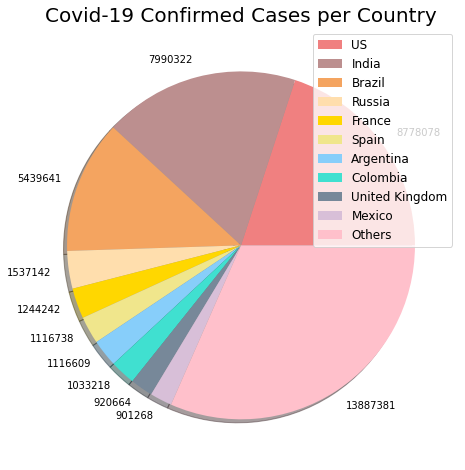

In [ ]:
pie_charts(unique_countries_visual, confirmed_cases_visual, 'Covid-19 Confirmed Cases per Country')

In [ ]:
# Plotting India's data with regional data using a pie chart
def pie_country_with_regions(country_name, title):
    pie_regions = list(data_latest[data_latest['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in pie_regions:
        cases = data_latest[data_latest['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        pie_regions.remove(i)

    # only show the top 10 states
    pie_regions = [k for k, v in sorted(zip(pie_regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(pie_regions)):
        confirmed_cases[i] = data_latest[data_latest['Province_State']==pie_regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(pie_regions)>10):
        pie_regions_10 = pie_regions[:10]
        pie_regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        pie_charts(pie_regions_10,confirmed_cases_10, title)
    else:
        pie_charts(pie_regions,confirmed_cases, title)

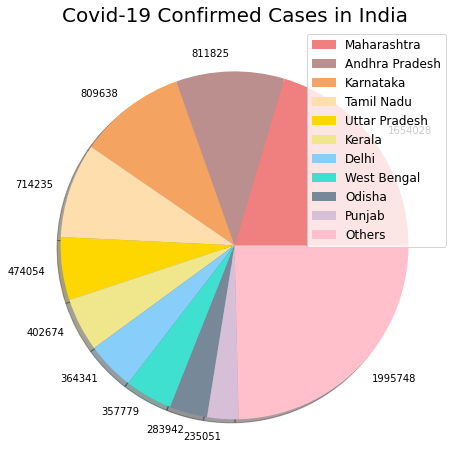

In [ ]:
pie_country_with_regions('India', 'Covid-19 Confirmed Cases in India')

# World and India's cases 

In [ ]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    sum_confirmed = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(sum_confirmed)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(sum_confirmed-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/sum_confirmed)
    recovery_rate.append(recovered_sum/sum_confirmed)



#For India
india_confirmed = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'India']
india_deaths = death_cases.loc[death_cases['Country/Region'] == 'India']
india_recovered = recovered_cases.loc[recovered_cases['Country/Region'] == 'India']
india_active=[]
mortality_rate_india = []
recovery_rate_india = []


confirmed_india = india_confirmed.loc[:, cols[4]:cols[-1]]
deaths_india = india_deaths.loc[:, cols[4]:cols[-1]]
recoveries_india = india_recovered.loc[:, cols[4]:cols[-1]]

confirmed_india = confirmed_india.values.tolist()
confirmed_india = confirmed_india[0]
deaths_india = deaths_india.values.tolist()
deaths_india = deaths_india[0]
recoveries_india = recoveries_india.values.tolist()
recoveries_india = recoveries_india[0]


l = len(confirmed_india)


for i in range(0,l):
 india_active.append(confirmed_india[i] -deaths_india[i] -recoveries_india[i])
 if (confirmed_india[i] != 0):
    mortality_rate_india.append(deaths_india[i]/confirmed_india[i])
    recovery_rate_india.append(recoveries_india[i]/confirmed_india[i])
 else:
   mortality_rate_india.append(0)
   recovery_rate_india.append(0)

# Daily increases and Moving averages

In [ ]:
def daily_increases_(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def  moving_averages_(data, window_size):
    moving_averages_ = []
    for i in range(len(data)):
        if i + window_size < len(data):
             moving_averages_.append(np.mean(data[i:i+window_size]))
        else:
             moving_averages_.append(np.mean(data[i:len(data)]))
    return  moving_averages_

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increases_(world_cases)
world_confirmed_avg=  moving_averages_(world_cases, window)
world_daily_increase_avg =  moving_averages_(world_daily_increase, window)

# deaths
world_daily_death = daily_increases_(total_deaths)
world_death_avg =  moving_averages_(total_deaths, window)
world_daily_death_avg =  moving_averages_(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increases_(total_recovered)
world_recovery_avg =  moving_averages_(total_recovered, window)
world_daily_recovery_avg =  moving_averages_(world_daily_recovery, window)


# active 
world_active_avg =  moving_averages_(total_active, window)

In [ ]:
#INDIA

# confirmed cases
india_daily_increase = daily_increases_(confirmed_india)
india_confirmed_avg=  moving_averages_(confirmed_india, window)
india_daily_increase_avg =  moving_averages_(india_daily_increase, window)

# deaths
india_daily_death = daily_increases_(deaths_india)
india_death_avg =  moving_averages_(deaths_india, window)
india_daily_death_avg =  moving_averages_(india_daily_death, window)


# recoveries
india_daily_recovery = daily_increases_(recoveries_india)
india_recovery_avg =  moving_averages_(recoveries_india, window)
india_daily_recovery_avg =  moving_averages_(india_daily_recovery, window)


# active 
india_active_avg =  moving_averages_(india_active, window)

In [ ]:
days_since_22_Jan = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

dates = confirmed.keys()
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
dates_adjusted = future_forcast[:-10]

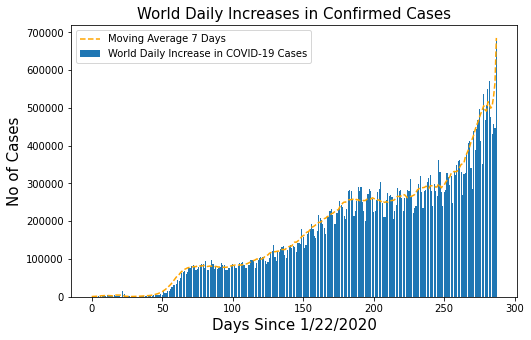

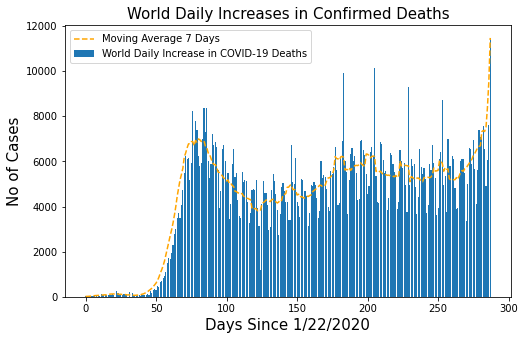

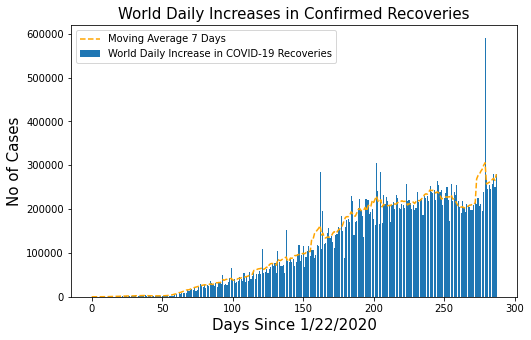

In [ ]:
dates_adjusted = dates_adjusted.reshape(1, -1)[0]

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_increase)
plt.plot(dates_adjusted, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_death)
plt.plot(dates_adjusted, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_recovery)
plt.plot(dates_adjusted, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

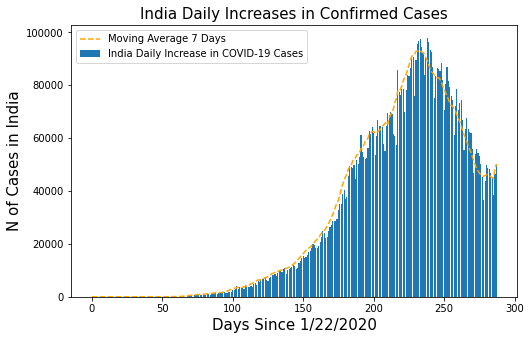

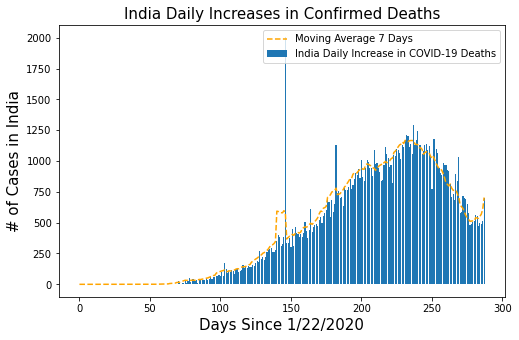

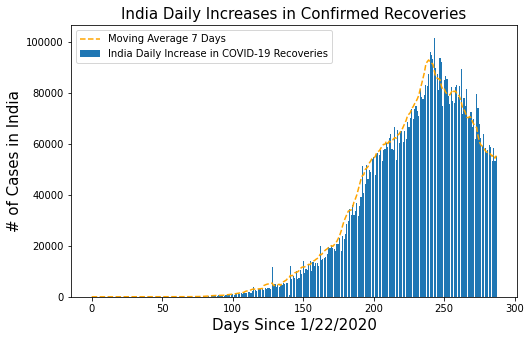

In [ ]:
# For India

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_increase)
plt.plot(dates_adjusted, india_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('N of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_death)
plt.plot(dates_adjusted, india_daily_death_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Deaths', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Deaths'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_recovery)
plt.plot(dates_adjusted, india_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Recoveries', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Recoveries'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

Convert integer into datetime for better visualization

In [ ]:
start_date = '1/22/2020'
start_date__ = datetime.datetime.strptime(start_date, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date__ + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

#Training sets

In [ ]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
world_x_train_confirmed, world_x_test_confirmed, world_y_train_confirmed, world_y_test_confirmed = train_test_split(days_since_22_Jan[50:], world_cases[50:], test_size=0.12, shuffle=False) 

#FOR INDIA
india_x_train_confirmed, india_x_test_confirmed, india_y_train_confirmed, india_y_test_confirmed = train_test_split(days_since_22_Jan[50:], confirmed_india[50:], test_size=0.12, shuffle=False) 

In [ ]:
def plot_model_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(8, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('No of Cases', size=15)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

#SVM

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(world_x_train_confirmed, world_y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

#FOR INDIA
india_svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
india_svm_confirmed.fit(india_x_train_confirmed, india_y_train_confirmed)
india_svm_pred = india_svm_confirmed.predict(future_forcast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Worldwide
svm_test_pred = svm_confirmed.predict(world_x_test_confirmed)
print('MAE:', mean_absolute_error(world_y_test_confirmed,svm_test_pred))
print('MSE:',mean_squared_error(world_y_test_confirmed,svm_test_pred))

MAE: 4709516.481801222
MSE: 22545599920517.97


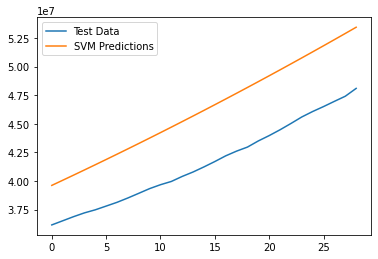

In [ ]:
plt.plot(world_y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<SVM Prediction> Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,<SVM Prediction> Confirmed Cases Worldwide
0,11/05/2020,53982693.0
1,11/06/2020,54533540.0
2,11/07/2020,55088212.0
3,11/08/2020,55646723.0
4,11/09/2020,56209085.0
5,11/10/2020,56775313.0
6,11/11/2020,57345419.0
7,11/12/2020,57919416.0
8,11/13/2020,58497318.0
9,11/14/2020,59079138.0


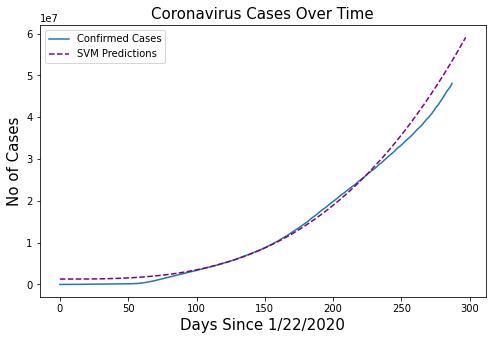

In [ ]:
plot_model_predictions(dates_adjusted, world_cases, svm_pred, 'SVM Predictions', 'purple')


In [ ]:
# FOR INDIA
india_svm_test_pred = india_svm_confirmed.predict(india_x_test_confirmed)
print('MAE for India:', mean_absolute_error(india_svm_test_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(india_svm_test_pred, india_y_test_confirmed))


MAE for India: 376524.28017039946
MSE for India: 190515284508.0191


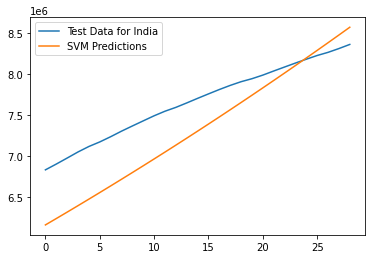

In [ ]:
plt.plot(india_y_test_confirmed)
plt.plot(india_svm_test_pred)
plt.legend(['Test Data for India', 'SVM Predictions'])

In [ ]:
# Future predictions using SVM 
india_svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<SVM Prediction> Confirmed Cases in India': np.round(india_svm_pred[-10:])})
india_svm_df

,Date,<SVM Prediction> Confirmed Cases in India
0,11/05/2020,8668980.0
1,11/06/2020,8764984.0
2,11/07/2020,8861654.0
3,11/08/2020,8958994.0
4,11/09/2020,9057005.0
5,11/10/2020,9155689.0
6,11/11/2020,9255050.0
7,11/12/2020,9355088.0
8,11/13/2020,9455807.0
9,11/14/2020,9557209.0


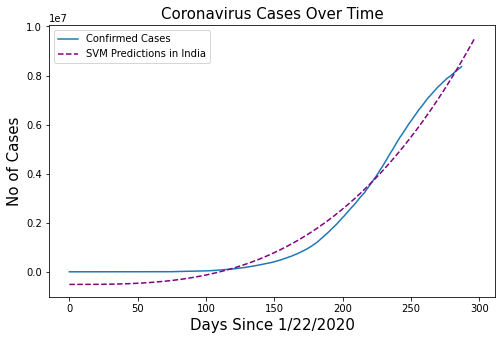

In [ ]:
plot_model_predictions(dates_adjusted, confirmed_india, india_svm_pred, 'SVM Predictions in India', 'purple')

#Polynomial Regression

In [ ]:
# transform our data for polynomial regression
_poly_ = PolynomialFeatures(degree=5)
poly__x_train_confirmed = _poly_.fit_transform(world_x_train_confirmed)
poly__x_test_confirmed = _poly_.fit_transform(world_x_test_confirmed)
poly_future_forcast = _poly_.fit_transform(future_forcast)

# For India
india_poly = PolynomialFeatures(degree=5)
india_poly__x_train_confirmed = india_poly.fit_transform(india_x_train_confirmed)
india_poly_x_test_confirmed = india_poly.fit_transform(india_x_test_confirmed)
india_poly_future_forcast = india_poly.fit_transform(future_forcast)


In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly__x_train_confirmed, world_y_train_confirmed)
test_linear_pred = linear_model.predict(poly__x_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, world_y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, world_y_test_confirmed))


MAE: 2691074.742177205
MSE: 10578580246590.732


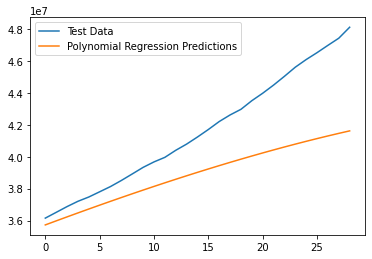

In [ ]:
plt.plot(world_y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Polynomial Prediction> Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df

,Date,<Polynomial Prediction> Confirmed Cases Worldwide
0,11/05/2020,41762714.0
1,11/06/2020,41908218.0
2,11/07/2020,42048384.0
3,11/08/2020,42183091.0
4,11/09/2020,42312214.0
5,11/10/2020,42435629.0
6,11/11/2020,42553209.0
7,11/12/2020,42664827.0
8,11/13/2020,42770355.0
9,11/14/2020,42869664.0


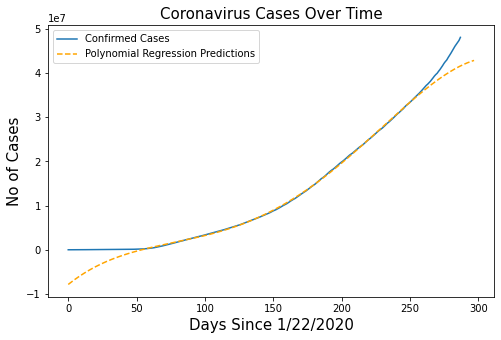

In [ ]:
plot_model_predictions(dates_adjusted, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [ ]:
# FOR INDIA
india_linear_model = LinearRegression(normalize=True, fit_intercept=False)
india_linear_model.fit(india_poly__x_train_confirmed, india_y_train_confirmed)
india_test_linear_pred = india_linear_model.predict(india_poly_x_test_confirmed)
india_linear_pred = india_linear_model.predict(india_poly_future_forcast)
print('MAE for India:', mean_absolute_error(india_test_linear_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(india_test_linear_pred,india_y_test_confirmed))


MAE for India: 167307.1420154777
MSE for India: 30663840074.73066


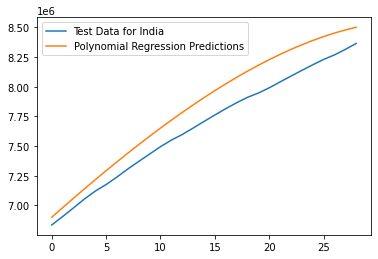

In [ ]:
plt.plot(india_y_test_confirmed)
plt.plot(india_test_linear_pred)
plt.legend(['Test Data for India ', 'Polynomial Regression Predictions'])

In [ ]:
india_linear_pred = india_linear_pred.reshape(1,-1)[0]
india_linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Polynomial Prediction> Confirmed Cases in India': np.round(india_linear_pred[-10:])})
india_linear_df

,Date,<Polynomial Prediction> Confirmed Cases in India
0,11/05/2020,8520105.0
1,11/06/2020,8535811.0
2,11/07/2020,8547732.0
3,11/08/2020,8555747.0
4,11/09/2020,8559731.0
5,11/10/2020,8559559.0
6,11/11/2020,8555103.0
7,11/12/2020,8546233.0
8,11/13/2020,8532819.0
9,11/14/2020,8514726.0


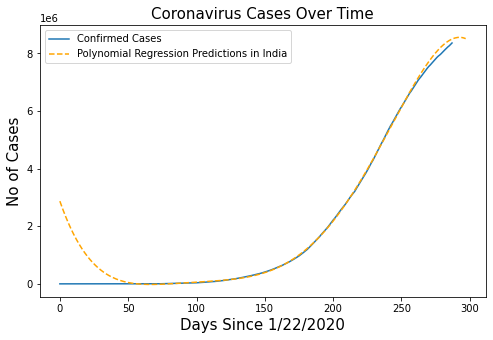

In [ ]:
plot_model_predictions(dates_adjusted, confirmed_india, india_linear_pred, 'Polynomial Regression Predictions in India', 'orange')

# BAYESIAN RIDGE POLYNOMIAL REGRESSION

In [ ]:
bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_x_train_confirmed = bayesian_poly.fit_transform(world_x_train_confirmed)
bayesian_poly_x_test_confirmed = bayesian_poly.fit_transform(world_x_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

india_bayesian_poly = PolynomialFeatures(degree=5)
india_bayesian_poly_x_train_confirmed = india_bayesian_poly.fit_transform(india_x_train_confirmed)
india_bayesian_poly_x_test_confirmed = india_bayesian_poly.fit_transform(india_x_test_confirmed)
india_bayesian_poly_future_forcast = india_bayesian_poly.fit_transform(future_forcast)


In [ ]:
bayesian=BayesianRidge()

In [ ]:
# worldwide
bayesian.fit(bayesian_poly_x_train_confirmed, world_y_train_confirmed)
bayesian_world_pred=bayesian.predict(bayesian_poly_x_test_confirmed)
bayesian_pred_world=bayesian.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(bayesian_world_pred, world_y_test_confirmed))
print('MSE:',mean_squared_error(bayesian_world_pred, world_y_test_confirmed))

MAE: 1508535.813378276
MSE: 3788949254235.14


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



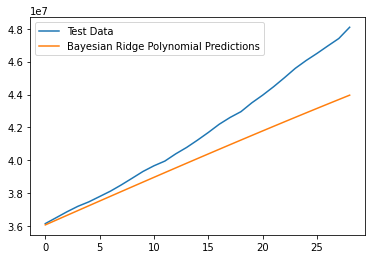

In [ ]:
plt.plot(world_y_test_confirmed)
plt.plot(bayesian_world_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [ ]:
# Future predictions using bayesian -WORLD
bayesian_world_future_pred = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Bayesian Classifier Prediction> Confirmed Cases Worldwide': np.round(bayesian_pred_world [-10:])})
bayesian_world_future_pred 

,Date,<Bayesian Classifier Prediction> Confirmed Cases Worldwide
0,11/05/2020,44227784.0
1,11/06/2020,44490687.0
2,11/07/2020,44751828.0
3,11/08/2020,45011149.0
4,11/09/2020,45268591.0
5,11/10/2020,45524095.0
6,11/11/2020,45777602.0
7,11/12/2020,46029051.0
8,11/13/2020,46278381.0
9,11/14/2020,46525532.0


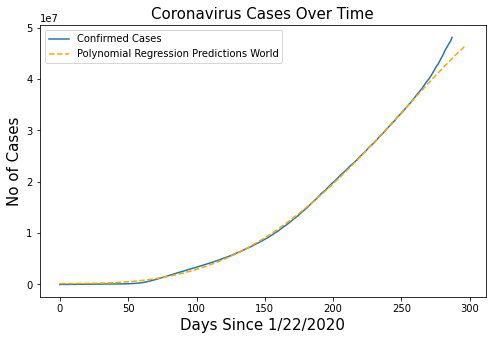

In [ ]:
plot_model_predictions(dates_adjusted, world_cases, bayesian_pred_world, 'Polynomial Regression Predictions World', 'orange')

In [ ]:
#For India
bayesian.fit(india_bayesian_poly_x_train_confirmed, india_y_train_confirmed)
bayesian_india_pred =bayesian.predict(india_bayesian_poly_x_test_confirmed)
bayesian_pred_india=bayesian.predict(india_bayesian_poly_future_forcast)
print('MAE for India:', mean_absolute_error(bayesian_india_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(bayesian_india_pred, india_y_test_confirmed))

MAE for India: 1153849.0697269798
MSE for India: 1687809646983.1697


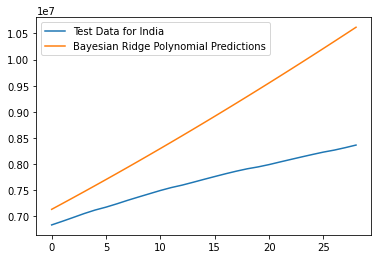

In [ ]:
plt.plot(india_y_test_confirmed)
plt.plot(bayesian_india_pred)
plt.legend(['Test Data for India', 'Bayesian Ridge Polynomial Predictions'])

In [ ]:
# Future predictions using bayesian- INDIA
bayesian_india_future_pred = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Bayesian Classifier Prediction> Confirmed Cases In India': np.round(bayesian_pred_india [-10:])})
bayesian_india_future_pred 

,Date,<Bayesian Classifier Prediction> Confirmed Cases In India
0,11/05/2020,10755847.0
1,11/06/2020,10893553.0
2,11/07/2020,11032041.0
3,11/08/2020,11171303.0
4,11/09/2020,11311331.0
5,11/10/2020,11452115.0
6,11/11/2020,11593645.0
7,11/12/2020,11735914.0
8,11/13/2020,11878911.0
9,11/14/2020,12022626.0


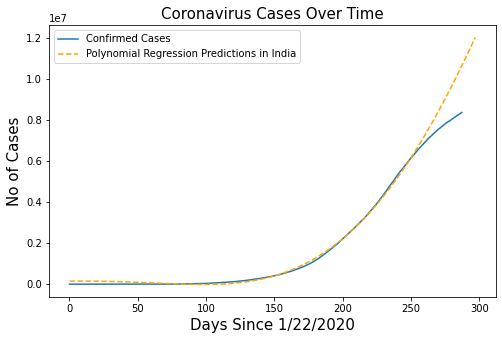

In [ ]:
plot_model_predictions(dates_adjusted, confirmed_india, bayesian_pred_india, 'Polynomial Regression Predictions in India', 'orange')